<a href="https://colab.research.google.com/github/ericlewisX/colorizing_images/blob/main/Cleaned_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.61.252.218:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.61.252.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.61.252.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/privateca/certificates/update.py
google-cloud-sdk/lib/surface/privateca/locations/__init__.py
google-cloud-sdk/lib/surface/privateca/locations/list.py
google-cloud-sdk/lib/surface/privateca/pools/__init__.py
google-cloud-sdk/lib/surface/privateca/pools/add_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/privateca/pools/create.py
google-cloud-sdk/lib/surface/privateca/pools/delete.py
google-cloud-sdk/lib/surface/privateca/pools/describe.yaml
google-cloud-sdk/lib/surface/privateca/pools/get_ca_certs.py
google-cloud-sdk/lib/surface/privateca/pools/get_iam_policy.yaml
google-cloud-sdk/lib/surface/privateca/pools/list.py
google-cloud-sdk/lib/surface/privateca/pools/remove_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/privateca/pools/set_iam_policy.yaml
google-cloud-sdk/lib/surface/privateca/pools/update.py
google-cloud-sdk/lib/surface/privateca/reusable_configs/__init__.py
google-cloud-sdk/lib/surfac

In [4]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: eric.lewish@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] eric.lewish@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [eric.lewish@gmail.com].

Pick cloud project to use: 
 [1] colorfy

In [5]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

In [6]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   130k      0 --:--:-- --:--:-- --:--:--  137k
OK


In [7]:
!apt -qq update

94 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [8]:
!apt -qq install gcsfuse

The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 94 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.35.1_amd64.deb ...
Unpacking gcsfuse (0.35.1) ...
Setting up gcsfuse (0.35.1) ...


In [9]:
!mkdir imagedataset

In [10]:
!gcsfuse --implicit-dirs colorizinggalvanize imagedataset/

2021/08/06 10:15:28.717341 Using mount point: /content/imagedataset
2021/08/06 10:15:28.724936 Opening GCS connection...
2021/08/06 10:15:28.935535 Mounting file system "colorizinggalvanize"...
2021/08/06 10:15:28.969445 File system has been successfully mounted.


In [11]:
from keras.preprocessing.image import load_img

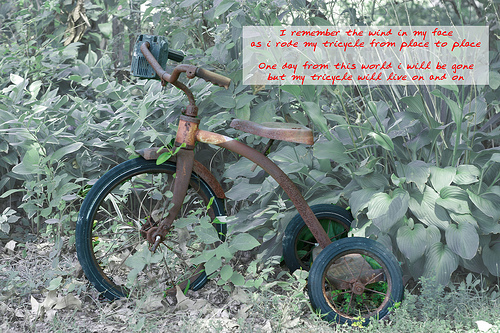

In [13]:
load_img('imagedataset/data/images/test/ILSVRC2012_test_00000008.JPEG')

### Tensor Set Up - Board/Callbacks

## Project Start

In [14]:
### Imports ###
# Boiler-Plate
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import datetime

## Image manipulation ##
from PIL import Image as im

from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave, imshow

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Activation, Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [31]:
# Load Data
data_generator = ImageDataGenerator(rescale = 1.0/255)

train_set = data_generator.flow_from_directory('imagedataset/teeney/images/', 
                                              batch_size=24,
                                               class_mode=None) 
                                               


Found 24 images belonging to 1 classes.


In [41]:
import os
path = 'imagedataset/teeney/images//teenyset'


In [45]:
def load_data(path):
  Z = []
  for img in os.listdir(path):
      img = load_img(path + '/' + img)
      Z.append(img)
  
  return Z


In [57]:
### Function declaration 1 ###
def imageset_splitter(training_set):
    '''
    This function takes in a training set of RGB images & returns 
    a nested array of images that will be the X and Y matrices based on the LAB colorspace.
    '''
    # Will populate these empty lists with L-channels and ab-channels.
    X, Y = [], []
    
    for img in training_set:
        # img = img_to_array(load_img(img))
        img1 = img.resize((256,256))
        lab = rgb2lab(img1)
        
        #Normalize 
        X.append(lab[:, :, 0])
        Y.append(lab[:, :, 1:] / 128) # ab channels
        
    X, Y = np.array(X), np.array(Y)
    X = X.reshape(X.shape + (1,)) # Make X & Y dimensions equal
    
    return  X, Y

In [46]:
load_data(path)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=198x90 at 0x7F0355BC2C90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F0355BC2D90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F0355BC2290>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x7F0355BC2ED0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F0355BC2FD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F0355BC2090>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x7F0355BC28D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F0355BC2790>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377 at 0x7F0355BD10D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=445x500 at 0x7F0355BC2390>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1145x859 at 0x7F0355BD1290>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x7F0355B

In [58]:
X, Y = imageset_splitter(Z)

In [59]:
### Design Model ### 

# encoder
encoder = keras.models.Sequential([
  # first encoding layer
  keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)),
  # keras.layers.MaxPooling2D(2),

  # 2nd encoding layer
  keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),

  # 3rd encoding layer
  keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", strides=2),
  # keras.layers.MaxPooling2D(2),

  # 4th encoding layer
  keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),

  # 5th encoding layer
  keras.layers.Conv2D(256,( 3, 3), activation="relu", padding="same", strides=2),
  # keras.layers.MaxPooling2D(2),

  # 6th encoding layer
  keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same"),

  # 7th encoding layer
  keras.layers.Conv2D(512, (3, 3), activation="relu", padding="same"),

  # 8th encoding layer
  keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same")
])

# decoder
decoder = keras.models.Sequential([
  
  # first decoding layer
  # keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  
  # second decoding layer
  keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
  keras.layers.UpSampling2D((2, 2)),
  
  # 3rd decoding layer
  # keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  
  # 4th decoding layer
  keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  keras.layers.UpSampling2D((2, 2)),

  # 5th decoding layer
  keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),

  # 6th decoding layer
  keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),

  # 7th decoding layer
  keras.layers.Conv2D(2, (3, 3), activation='tanh', padding='same'),
  keras.layers.UpSampling2D((2, 2))


])

# autoencoder
autoencoder = keras.models.Sequential([encoder, decoder])

opt = keras.optimizers.Adam(learning_rate = 0.01)

autoencoder.compile(loss="mse", optimizer = opt, metrics=['accuracy']) 

autoencoder.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 32, 32, 256)       5827200   
_________________________________________________________________
sequential_4 (Sequential)    (None, 256, 256, 2)       392210    
Total params: 6,219,410
Trainable params: 6,219,410
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Train the model on the dataset
autoencoder.fit(X, Y, validation_split = 0.1, epochs = 10, batch_size = 64, verbose = 1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.9254 - accuracy: 0.7091 - val_loss: 0.8770 - val_accuracy: 0.7799
Epoch 8/10
1/1 [=========================

In [62]:
autoencoder.save('model/colorize_autoencoder_model')

INFO:tensorflow:Assets written to: model/colorize_autoencoder_model/assets


INFO:tensorflow:Assets written to: model/colorize_autoencoder_model/assets


UnimplementedError: ignored

In [ ]:
#Load saved model and test on images.

tf.keras.models.load_model(
    'other_files/colorize_autoencoder10.model',
    custom_objects=None,
    compile=True)

img1_color=[]
img1=img_to_array(load_img('images/sunset.png'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imsave("result.png", lab2rgb(result))